# Michael Fang

### Research question/interests:
## **How are sales effected by holidays?**
## **Is it possible to predict exceptional good/bad sales based on existing holidays, or the neighboring weeks of sales?**
######
Initial Research question: **What weeks are Walmart the most/least profitable, and do holidays significantly impact these sales? In what direction?**

First iteration: **How are sales effected by holidays? Is it possible to predict exceptional good/bad sales based on existing holidays, or the neighboring weeks of sales?**

This research question allows us to obtain a general understanding of Walmart's operating performance change throughout the year, and theorize the trend of profit. The way I will do this analysis is first to combine the data within each store location together according to weeks into one data, and consolidate a new datasheet. After that, I will organize the data ranking weekly sales from highest to lowest to showcase the general trend of sales change. There might potentially be a week that the revenue is exceptionally high for all three years monetized. Furthermore, I will add the information regarding holidays and see whether it has a correlation with higher sales. 

In [2]:
import pandas as pd

MFdf = pd.read_csv('../data/raw/Walmart.csv')
MFdf

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
MFdf.shape

(6435, 8)

In [5]:
MFdf.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
MFdf.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [7]:
MFdf.nunique(axis=0)

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [8]:
MFdf.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Cleaning

In [9]:
MFdf_rmColumns = MFdf.copy().drop(['Temperature','Fuel_Price','CPI','Unemployment'], axis=1)
MFdf_rmColumns.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag
0,1,05-02-2010,1643690.90,0
1,1,12-02-2010,1641957.44,1
2,1,19-02-2010,1611968.17,0
3,1,26-02-2010,1409727.59,0
4,1,05-03-2010,1554806.68,0
5,1,12-03-2010,1439541.59,0
6,1,19-03-2010,1472515.79,0
7,1,26-03-2010,1404429.92,0
8,1,02-04-2010,1594968.28,0
9,1,09-04-2010,1545418.53,0


This section selects the unused columns of data and remove them from the dataset
# 






In [10]:
MFdf_rmColumns = MFdf_rmColumns.copy().drop(['Store'], axis=1)
MFdf_rmColumns['Date'] = pd.to_datetime(MFdf_rmColumns['Date'], dayfirst=True, yearfirst=False)

MFdf_groupbyWeeks = MFdf_rmColumns.groupby('Date').mean().round()
MFdf_groupbyWeeks = MFdf_groupbyWeeks.sort_values(by=['Date']).reset_index()
MFdf_groupbyWeeks

,Date,Weekly_Sales,Holiday_Flag
0,2010-02-05,1105572.0,0.0
1,2010-02-12,1074148.0,1.0
2,2010-02-19,1072822.0,0.0
3,2010-02-26,977079.0,0.0
4,2010-03-05,1041588.0,0.0
...,...,...,...
138,2012-09-28,971887.0,0.0
139,2012-10-05,1057036.0,0.0
140,2012-10-12,1025078.0,0.0
141,2012-10-19,1002720.0,0.0


This section of the wrangling modify data in the Date column from strings into numerical dates recognized by python, groups the data by weeeks taking the mean, and then sort it by asending dates. 
# 

In [11]:
MFdf_groupbyWeeks = MFdf_groupbyWeeks.reset_index()
MFdf_groupbyWeeks = MFdf_groupbyWeeks.rename(columns={'index': 'Week#'})

MFdf_groupbyWeeks['Previous_Week_Sales'] = MFdf_groupbyWeeks['Weekly_Sales'].shift(1)
MFdf_groupbyWeeks['WoW_Changes'] = (MFdf_groupbyWeeks['Weekly_Sales'] - MFdf_groupbyWeeks['Previous_Week_Sales'])/MFdf_groupbyWeeks['Previous_Week_Sales']
MFdf_groupbyWeeks['WoW_Changes'] = MFdf_groupbyWeeks['WoW_Changes'].apply(lambda x: f"{x*100:.2f}%")
MFdf_groupbyWeeks

,Week#,Date,Weekly_Sales,Holiday_Flag,Previous_Week_Sales,WoW_Changes
0,0,2010-02-05,1105572.0,0.0,NaN,nan%
1,1,2010-02-12,1074148.0,1.0,1105572.0,-2.84%
2,2,2010-02-19,1072822.0,0.0,1074148.0,-0.12%
3,3,2010-02-26,977079.0,0.0,1072822.0,-8.92%
4,4,2010-03-05,1041588.0,0.0,977079.0,6.60%
...,...,...,...,...,...,...
138,138,2012-09-28,971887.0,0.0,985657.0,-1.40%
139,139,2012-10-05,1057036.0,0.0,971887.0,8.76%
140,140,2012-10-12,1025078.0,0.0,1057036.0,-3.02%
141,141,2012-10-19,1002720.0,0.0,1025078.0,-2.18%


This section of the wrangling:
* Creates a new column listing the week number
* Creates a new column showcasing the privious week's sales,
* Creates a new column Show casing the WoW changes as a percentage.
# 

## Exploratory Visualizations:

In [12]:

sns.set_style("whitegrid")
sns.set_palette("deep")
sns.set(font_scale=3)
sns.set(rc={"font.family": "Arial"})



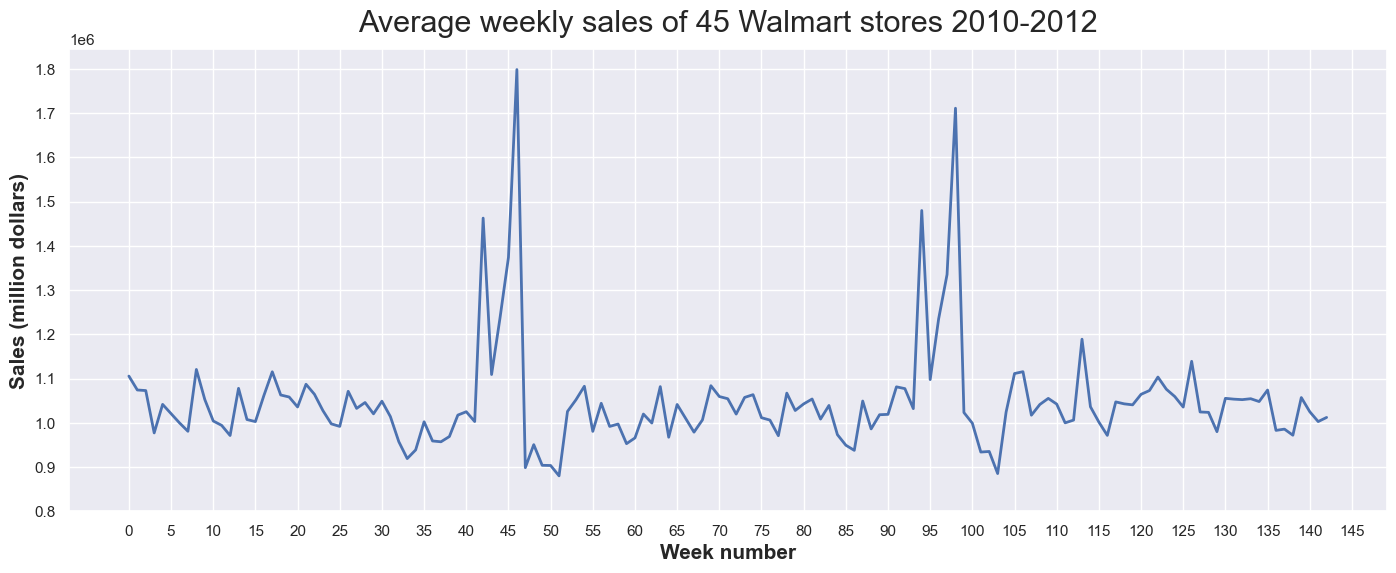

In [13]:
fig, EV1 = plt.subplots(figsize=(17, 6))
EV1.plot(MFdf_groupbyWeeks['Week#'], MFdf_groupbyWeeks['Weekly_Sales'], linewidth=2, linestyle='-')

EV1.set_xlabel("Week number", fontsize=15, fontweight="bold")
EV1.set_ylabel("Sales (million dollars)", fontsize=15, fontweight="bold")
EV1.set_title("Average weekly sales of 45 Walmart stores 2010-2012", fontsize=22, y=1.02)

EV1.set_xticks(range(0,150,5))
EV1.set_yticks(range(800000,1900000,100000))


#EV1 = sns.relplot(data=MFdf_groupbyWeeks, kind='line', x='Week#', y='Weekly_Sales', height=6, aspect=2)
#EV1.set_xlabels("Week number", fontsize=15, fontweight="bold")
#EV1.set_ylabels("Sales (million dollars)", fontsize=15, fontweight="bold")
#EV1.fig.suptitle("Average weekly sales of 45 Walmart stores 2010-2012", fontsize=22, y=1.02)

### Observations
This chart showcases the weekly sales amount in millions of dollars organized in ascending weeks from 2010 to 2012. We can see that the general trend of the weekly sale fluctuates within a range of between 0.9 to 1.1 million. There are two notable exceptions where it indicates two big jumps in sales, following that is a recession period with lower average weekly sales. We shall further analyze this outlier. 
</br>
</br>
</br>

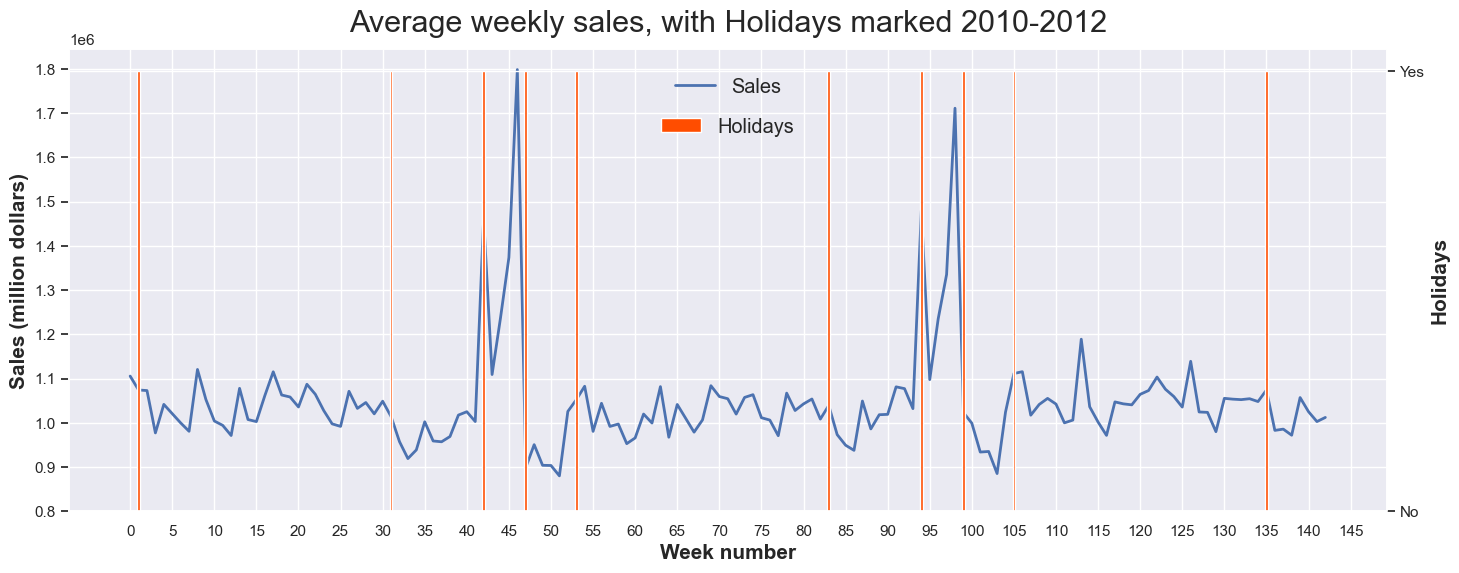

In [14]:

fig, EV1 = plt.subplots(figsize=(17, 6))
EV1.plot(MFdf_groupbyWeeks['Week#'], MFdf_groupbyWeeks['Weekly_Sales'], linewidth=2, linestyle='-',label='Sales')

EV2 = EV1.twinx()
EV2.bar(MFdf_groupbyWeeks['Week#'], MFdf_groupbyWeeks['Holiday_Flag'], 0.3, color='#FF4D00',label='Holidays')

EV1.set_xlabel("Week number", fontsize=15, fontweight="bold")
EV1.set_ylabel("Sales (million dollars)", fontsize=15, fontweight="bold")
EV1.set_title("Average weekly sales, with Holidays marked 2010-2012", fontsize=22, y=1.02)
EV1.set_xticks(range(0,150,5))
EV1.set_yticks(range(800000,1900000,100000))
EV1.legend(loc='upper center', fontsize='large',handlelength=2, frameon=False, borderaxespad=1)

EV2.set_ylabel("Holidays", fontsize=15, fontweight="bold")
EV2.set_yticks([0,1],['No','Yes'])
EV2.legend(loc='upper center', fontsize='large',handlelength=2, frameon=False, borderaxespad=3)




### Observations
Marking down the weeks where a holiday occures, we can see outlined period does seems to have some sort of correlation with weekly sales with the big jump.
</br>
</br>
</br>

In [15]:
MFdf_sortbySales = MFdf_groupbyWeeks.sort_values(by='Weekly_Sales', ascending=False).reset_index()
MFdf_sortbySales = MFdf_sortbySales.copy().drop(['index'], axis=1)
MFdf_sortbySales['Week#'] = MFdf_sortbySales['Week#'].astype(str)
MFdf_sortbySales

,Week#,Date,Weekly_Sales,Holiday_Flag,Previous_Week_Sales,WoW_Changes
0,46,2010-12-24,1798476.0,0.0,1373796.0,30.91%
1,98,2011-12-23,1711072.0,0.0,1335238.0,28.15%
2,94,2011-11-25,1479858.0,1.0,1031977.0,43.40%
3,42,2010-11-26,1462689.0,1.0,1002791.0,45.86%
4,45,2010-12-17,1373796.0,0.0,1237039.0,11.06%
...,...,...,...,...,...,...
138,49,2011-01-14,903860.0,0.0,950573.0,-4.91%
139,50,2011-01-21,903437.0,0.0,903860.0,-0.05%
140,47,2010-12-31,898500.0,1.0,1798476.0,-50.04%
141,103,2012-01-27,885222.0,0.0,935133.0,-5.34%


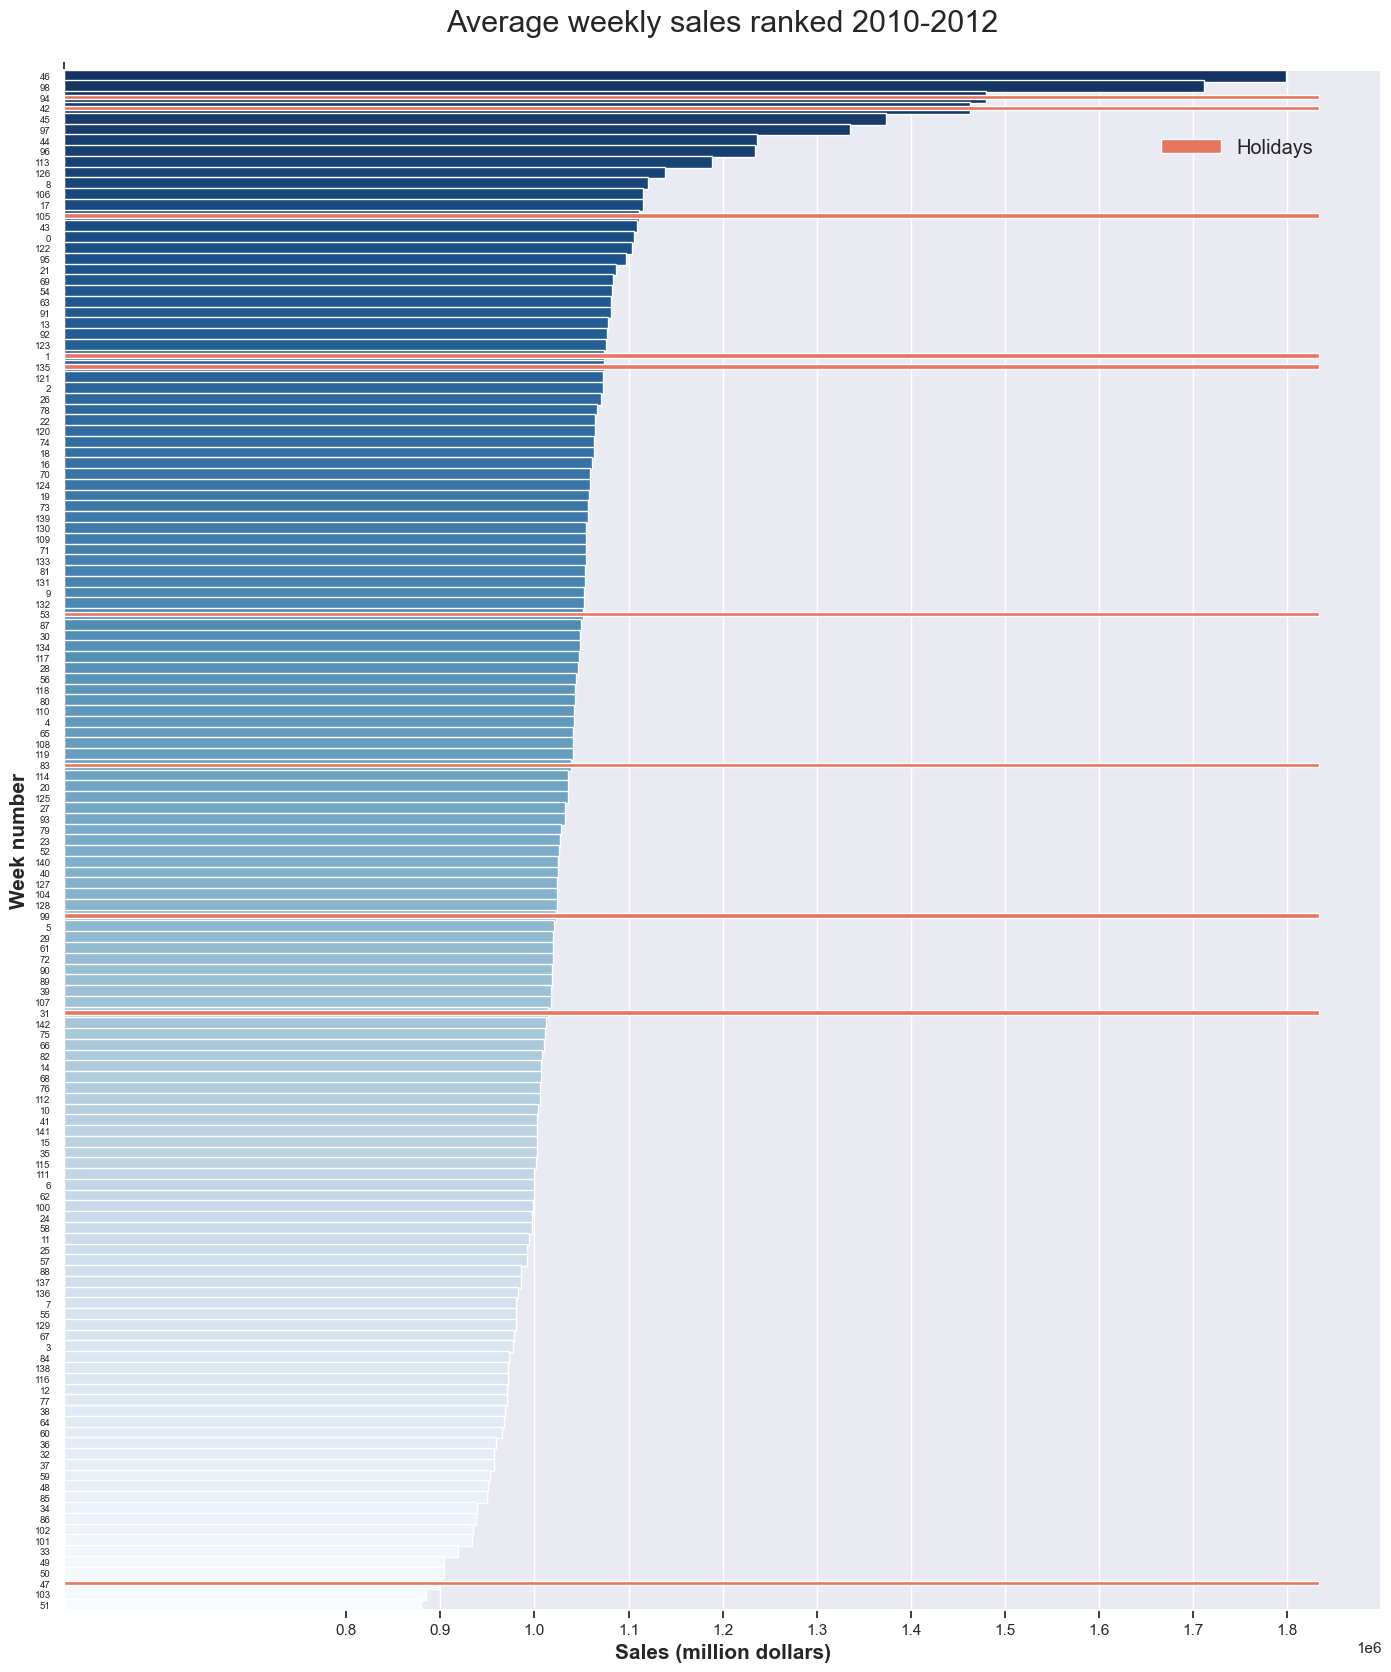

In [16]:
fig, EV3 = plt.subplots(figsize=(17, 20))

colors_1 = sns.color_palette("Blues_r", len(MFdf_sortbySales['Week#']))
sns.barplot(x="Weekly_Sales", y="Week#", data=MFdf_sortbySales, label="Sales", orient='h', palette=colors_1, width=1.1)

EV3_2 = EV3.twiny()
colors_2 = sns.color_palette("Reds", 1)
sns.barplot(x="Holiday_Flag", y="Week#", data=MFdf_sortbySales, orient='h', label="Holidays", palette=colors_2, width=0.4)

EV3.set_ylabel("Week number", fontsize=15, fontweight="bold")
EV3.set_xlabel("Sales (million dollars)", fontsize=15, fontweight="bold")
EV3.set_title("Average weekly sales ranked 2010-2012", fontsize=22, y=1.02)

EV3.set_xticks(range(800000,1900000,100000))
EV3.tick_params(axis='y', labelsize=7)
EV3.set_xlim([500000, 1900000])

EV3_2.set_xlabel(" ")
EV3_2.set_xticks([0],[' '])
EV3_2.legend(loc='upper right', fontsize='large',handlelength=3, frameon=False, borderaxespad=3)



### Observations
This chart shows the re assorted weekly data ranked by sales amount, from a rough estimate by looking at it, most of weeks that have a holiday learn toward the top of the chart, third and fourth highest weeks of sale have holiday within those weeks. This chart can provide the hypothesis where holiday does have a positive effect toward weekly sales. 
</br>
</br>
</br>

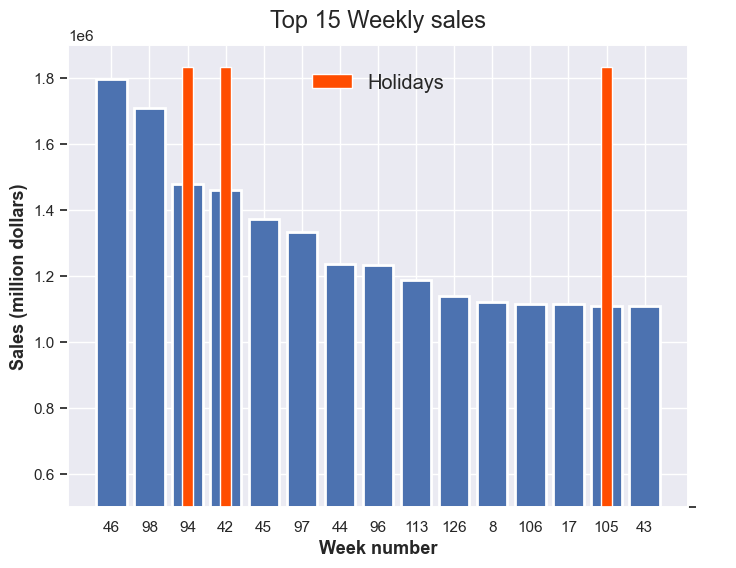

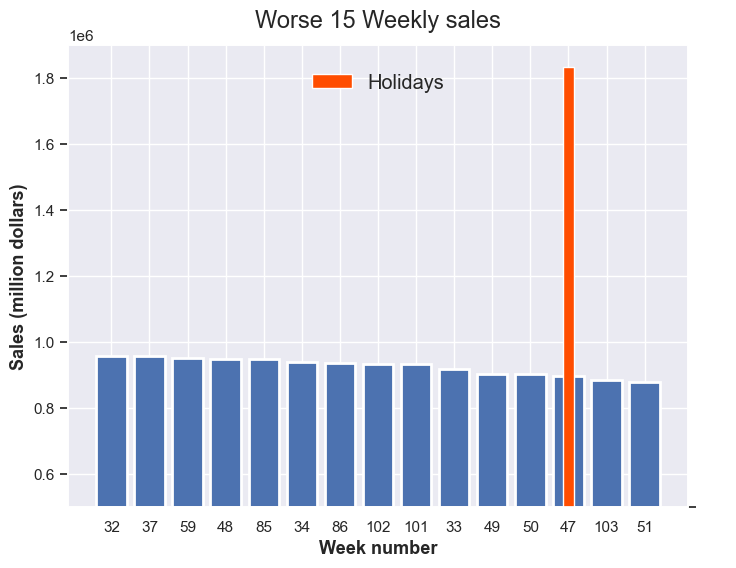

In [17]:
MFdf_topSales = MFdf_sortbySales.head(15)
MFdf_worseSales = MFdf_sortbySales.tail(15)

fig, EV4_1 = plt.subplots(figsize=(8, 6))
EV4_1.bar(MFdf_topSales['Week#'], MFdf_topSales['Weekly_Sales'], linewidth=2, label='Sales')

EV4_1_2 = EV4_1.twinx()
EV4_1_2.bar(MFdf_topSales['Week#'], MFdf_topSales['Holiday_Flag'], 0.3, color='#FF4D00',label='Holidays')

EV4_1.set_xlabel("Week number", fontsize=13, fontweight="bold")
EV4_1.set_ylabel("Sales (million dollars)", fontsize=13, fontweight="bold")
EV4_1.set_title("Top 15 Weekly sales", fontsize=17, y=1.02)
EV4_1.set_ylim([500000, 1900000])

EV4_1_2.set_ylabel(" ")
EV4_1_2.set_yticks([0],[' '])
EV4_1_2.legend(loc='upper center', fontsize='large',handlelength=2, frameon=False, borderaxespad=1)


fig, EV4_2 = plt.subplots(figsize=(8, 6))
EV4_2.bar(MFdf_worseSales['Week#'], MFdf_worseSales['Weekly_Sales'], linewidth=2, label='Sales')

EV4_2_2 = EV4_2.twinx()
EV4_2_2.bar(MFdf_worseSales['Week#'], MFdf_worseSales['Holiday_Flag'], 0.3, color='#FF4D00',label='Holidays')

EV4_2.set_xlabel("Week number", fontsize=13, fontweight="bold")
EV4_2.set_ylabel("Sales (million dollars)", fontsize=13, fontweight="bold")
EV4_2.set_title("Worse 15 Weekly sales", fontsize=17, y=1.02)
EV4_2.set_ylim([500000, 1900000])


EV4_2_2.set_ylabel(" ")
EV4_2_2.set_yticks([0],[' '])
EV4_2_2.legend(loc='upper center', fontsize='large',handlelength=2, frameon=False, borderaxespad=1)


### Observations
By separating out the 15 best weeks and 15 worse weeks of sale, we can see that three of the weeks that have a holiday lies within the top week. One exception is week 47 being one of the worse weeks, this could be the result of the preceding week being the highest week of sales, and there might have been a rebound in consumer demand. Maybe we can further analyze the relationship between current weeks and preceding weeks in general.
</br>
</br>
</br>

In [18]:
MFdf_topSales['WoW_Changes'] = MFdf_topSales['WoW_Changes'].str.replace('%', '')
MFdf_topSales['WoW_Changes'] = MFdf_topSales['WoW_Changes'].astype(float)

C:\Users\25735\AppData\Local\Temp\ipykernel_35408\1841121503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MFdf_topSales['WoW_Changes'] = MFdf_topSales['WoW_Changes'].str.replace('%', '')
C:\Users\25735\AppData\Local\Temp\ipykernel_35408\1841121503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MFdf_topSales['WoW_Changes'] = MFdf_topSales['WoW_Changes'].astype(float)


In [19]:
MFdf_worseSales['WoW_Changes'] = MFdf_worseSales['WoW_Changes'].str.replace('%', '')
MFdf_worseSales['WoW_Changes'] = MFdf_worseSales['WoW_Changes'].astype(float)

C:\Users\25735\AppData\Local\Temp\ipykernel_35408\1616028315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MFdf_worseSales['WoW_Changes'] = MFdf_worseSales['WoW_Changes'].str.replace('%', '')
C:\Users\25735\AppData\Local\Temp\ipykernel_35408\1616028315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MFdf_worseSales['WoW_Changes'] = MFdf_worseSales['WoW_Changes'].astype(float)


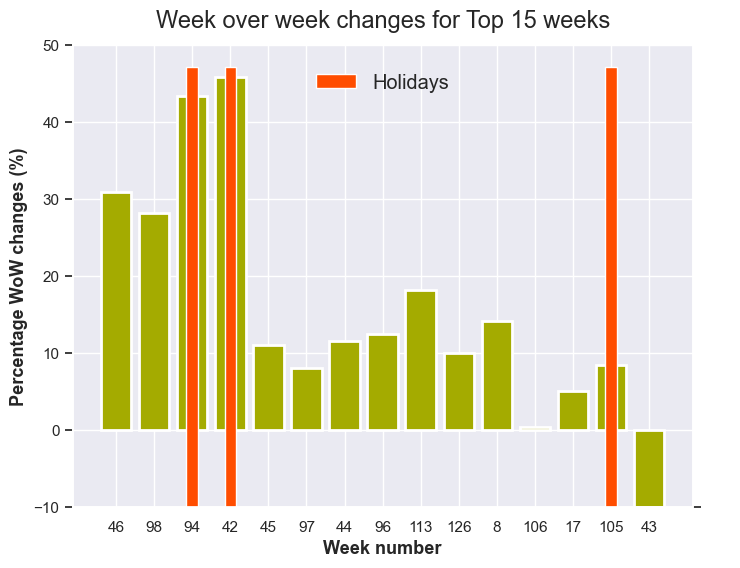

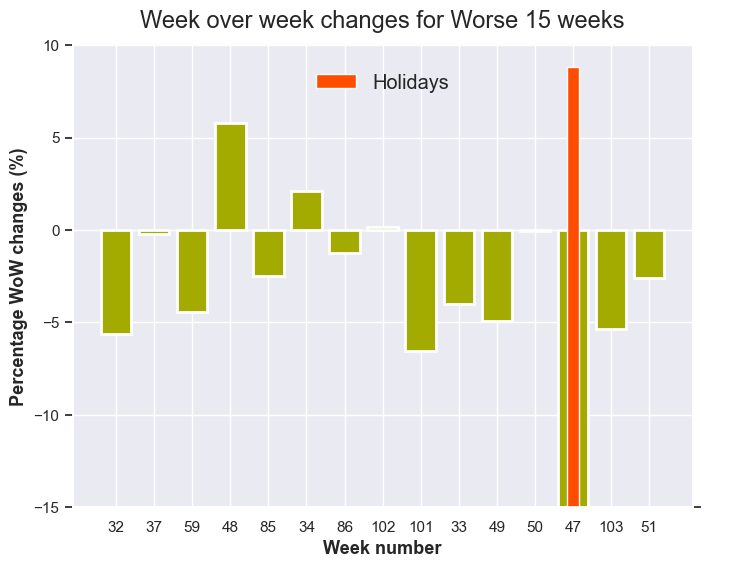

In [20]:
fig, EV5_2 = plt.subplots(figsize=(8, 6))
EV5_2.bar(MFdf_topSales['Week#'], MFdf_topSales['WoW_Changes'], linewidth=2, label='WoW changes', color='#A4AB00')

EV5_2_2 = EV5_2.twinx()
EV5_2_2.bar(MFdf_topSales['Week#'], MFdf_topSales['Holiday_Flag'], 0.3, color='#FF4D00',label='Holidays')

EV5_2.set_xlabel("Week number", fontsize=13, fontweight="bold")
EV5_2.set_ylabel("Percentage WoW changes (%)", fontsize=13, fontweight="bold")
EV5_2.set_title("Week over week changes for Top 15 weeks", fontsize=17, y=1.02)
EV5_2.set_ylim([-10, 50])

EV5_2_2.set_ylabel(" ")
EV5_2_2.set_yticks([0],[' '])
EV5_2_2.legend(loc='upper center', fontsize='large',handlelength=2, frameon=False, borderaxespad=1)

fig, EV5_1 = plt.subplots(figsize=(8, 6))
EV5_1.bar(MFdf_worseSales['Week#'], MFdf_worseSales['WoW_Changes'], linewidth=2, label='WoW changes', color='#A4AB00')

EV5_1_2 = EV5_1.twinx()
EV5_1_2.bar(MFdf_worseSales['Week#'], MFdf_worseSales['Holiday_Flag'], 0.3, color='#FF4D00',label='Holidays')

EV5_1.set_xlabel("Week number", fontsize=13, fontweight="bold")
EV5_1.set_ylabel("Percentage WoW changes (%)", fontsize=13, fontweight="bold")
EV5_1.set_title("Week over week changes for Worse 15 weeks", fontsize=17, y=1.02)
EV5_1.set_ylim([-15, 10])

EV5_1_2.set_ylabel(" ")
EV5_1_2.set_yticks([0],[' '])
EV5_1_2.legend(loc='upper center', fontsize='large',handlelength=2, frameon=False, borderaxespad=1)




### Observations
In this chart, we have showcased the week-over-week percentage(percentage change of the current week's sales compared to the preceding week) for the best and worse weeks. We can see that almost all of the best weeks have a big positive percentage, indicating the best weeks were a big jump compared to the preceding week. Most of the WoW percent for the worse weeks is negative, indicating the worse weeks of sales saw a big decrease compared to the preceding week. Week 47 the holiday outlier, saw the biggest negative WoW change value, we could estimate that there were some other factors involved during that period that changed the consumption habit to an earlier period.
</br>
</br>
</br>

## Summary observations
The data indicates that the average weekly sales of 45 stores generally fluctuate around a small range of 0.9 - 1.1 million. However, looking at the line graph, there are exceptional periods where big jumps or dips in sales are seen. Holiday periods appear to be aligned with the biggest jumps in sales, as three of the 15 weeks with the highest sales contain holidays. In contrast, the worst 15 weeks have only one holiday exception, which is a period following the biggest week of sale. One guess for this exception could be that year's operating strategy had a presale for that holiday. 

Examining the neighboring periods of the top weeks, it was observed that 14 out of the 15 weeks showed a big jump from the preceding period in sales, as indicated by the WoW change indicator. It was also noted that big sales usually last for less than a week. Conversely, the majority of the worse sale period has a negative WoW indicator.It seems that monitoring the WoW change indicator may help identify potential sales trends.

## Data Analysis Pipeline
1. Load Data
    * Import required python function library.
    * Load the data using .read_csv
    * use functions such as .head .describe() .shape .nunique() to get an understanding of the columns and rows
1. Clean Data
    * Removed some columns that are not used in analysis
    * remove some of the data that has duplicate purpose to the analysis 
    * turn the type of data in the 'Date' column from strings into numerical dates recognized by python 
1. Process Data
    * Organize the dates and group the dataset by taking the mean value of weeks, sort the data in order and reset the index
    * Create a new dataset that ranks the weekly sales from highest to lowest
1. Wrangle Data
    * Create a new column of data listing the previous week's sale 
    * Use the column of previous week's sale and current week's sale to compose a new column listing week over week change
    * Convert the data in WoW change column into percentage data
1. Exploratory Data Analysis
    * N/A
1. Data Analysis
    * N/A
1. Reporting
    * N/A




## Method Chaining

In [21]:
# Wrangled dataset sorted by ascending date
MFdf1 = (
    pd.read_csv('../data/raw/Walmart.csv')
    .copy().drop(['Store', 'Temperature','Fuel_Price','CPI','Unemployment'], axis=1)
    .assign(Date=pd.to_datetime(pd.read_csv('../data/raw/Walmart.csv')['Date'], dayfirst=True, yearfirst=False))    
    .groupby('Date').mean().round()
    .sort_values(by=['Date']).reset_index()
    .reset_index()
    .rename(columns={'index': 'Week#'})
    .assign(Previous_Week_Sales=lambda x: x['Weekly_Sales'].shift(1))
    .assign(WoW_Changes=lambda x: (x['Weekly_Sales'] - x['Previous_Week_Sales']) / x['Previous_Week_Sales'])
    .assign(WoW_Changes=lambda x: x['WoW_Changes'].apply(lambda x: f"{x*100:.2f}%"))
)

# Wrangled dataset sorted by weekly sales
MFdf2 = (MFdf1
    .sort_values(by='Weekly_Sales', ascending=False)
    .reset_index().copy().drop(['index'], axis=1)
    .astype({'Week#': str})
)

MFdf_topSales = MFdf2.head(15)
MFdf_worseSales = MFdf2.tail(15)

MFdf_topSales

,Week#,Date,Weekly_Sales,Holiday_Flag,Previous_Week_Sales,WoW_Changes
0,46,2010-12-24,1798476.0,0.0,1373796.0,30.91%
1,98,2011-12-23,1711072.0,0.0,1335238.0,28.15%
2,94,2011-11-25,1479858.0,1.0,1031977.0,43.40%
3,42,2010-11-26,1462689.0,1.0,1002791.0,45.86%
4,45,2010-12-17,1373796.0,0.0,1237039.0,11.06%
5,97,2011-12-16,1335238.0,0.0,1234692.0,8.14%
6,44,2010-12-10,1237039.0,0.0,1109090.0,11.54%
7,96,2011-12-09,1234692.0,0.0,1097568.0,12.49%
8,113,2012-04-06,1188940.0,0.0,1006064.0,18.18%
9,126,2012-07-06,1138956.0,0.0,1035491.0,9.99%


This is all of the data wrangling summarized usuing method chaining, here are the modifications that are a part of this chain:
* Locate the data and load it using Python Pandas,
* Selected the unused columns of data and drop them,
* Modify data in the Date column from strings into numerical dates recognized by python,
* Group the data by weeeks taking the mean of data,
* Sort it by dates,
* Create a new column listing the week number
* Create a new column showcasing the privious week's sales,
* Create a new column Show casing the WoW changes as a percentage,
* Copy this dataset and rank it from highest weekly sales to lowest. 



## Function Creation 

In [22]:
def dataset_processing(url_or_path_to_csv_file, wrangling_method):
    '''
    This functions wrangles the dataset into a more convinient form during data analysis for the relationship between weekly sales, Holidays, WoW changes etc.
    Input path or url as first argument, wrangling method as second argument.
    '''
    
    MFdf1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .copy().drop(['Store', 'Temperature','Fuel_Price','CPI','Unemployment'], axis=1)
        .assign(Date=pd.to_datetime(pd.read_csv(url_or_path_to_csv_file)['Date'], dayfirst=True, yearfirst=False))    
        .groupby('Date').mean().round()
        .sort_values(by=['Date']).reset_index()
        .reset_index()
        .rename(columns={'index': 'Week#'})
        .assign(Previous_Week_Sales=lambda x: x['Weekly_Sales'].shift(1))
        .assign(WoW_Changes=lambda x: (x['Weekly_Sales'] - x['Previous_Week_Sales']) / x['Previous_Week_Sales'])
        .assign(WoW_Changes=lambda x: x['WoW_Changes'].apply(lambda x: f"{x*100:.2f}%"))
    )
    
    MFdf2 = (MFdf1
        .sort_values(by='Weekly_Sales', ascending=False)
        .reset_index().copy().drop(['index'], axis=1)
        .astype({'Week#': str})
    )
    
    if wrangling_method == 'by weeks':
        return MFdf1
    elif wrangling_method == 'by sales':
        return MFdf2
    else:
        print('Wrangling method input incorrect, try "by weeks" or "by sales".') 
    
    

In [23]:
help(dataset_processing)

Help on function dataset_processing in module __main__:

dataset_processing(url_or_path_to_csv_file, wrangling_method)
    This functions wrangles the dataset into a more convinient form during data analysis for the relationship between weekly sales, Holidays, WoW changes etc.
    Input path or url as first argument, wrangling method as second argument.



In [24]:
dataset_processing('../data/raw/Walmart.csv', 'by weeks')

,Week#,Date,Weekly_Sales,Holiday_Flag,Previous_Week_Sales,WoW_Changes
0,0,2010-02-05,1105572.0,0.0,NaN,nan%
1,1,2010-02-12,1074148.0,1.0,1105572.0,-2.84%
2,2,2010-02-19,1072822.0,0.0,1074148.0,-0.12%
3,3,2010-02-26,977079.0,0.0,1072822.0,-8.92%
4,4,2010-03-05,1041588.0,0.0,977079.0,6.60%
...,...,...,...,...,...,...
138,138,2012-09-28,971887.0,0.0,985657.0,-1.40%
139,139,2012-10-05,1057036.0,0.0,971887.0,8.76%
140,140,2012-10-12,1025078.0,0.0,1057036.0,-3.02%
141,141,2012-10-19,1002720.0,0.0,1025078.0,-2.18%


In [25]:
import sys
sys.path.append("./code")
import project_functions2 

import importlib
importlib.reload(project_functions2)
project_functions2.dataset_processing('../data/raw/Walmart.csv', 'by sales')

,Week#,Date,Weekly_Sales,Holiday_Flag,Previous_Week_Sales,WoW_Changes
0,46,2010-12-24,1798476.0,0.0,1373796.0,30.91%
1,98,2011-12-23,1711072.0,0.0,1335238.0,28.15%
2,94,2011-11-25,1479858.0,1.0,1031977.0,43.40%
3,42,2010-11-26,1462689.0,1.0,1002791.0,45.86%
4,45,2010-12-17,1373796.0,0.0,1237039.0,11.06%
...,...,...,...,...,...,...
138,49,2011-01-14,903860.0,0.0,950573.0,-4.91%
139,50,2011-01-21,903437.0,0.0,903860.0,-0.05%
140,47,2010-12-31,898500.0,1.0,1798476.0,-50.04%
141,103,2012-01-27,885222.0,0.0,935133.0,-5.34%


## Exporting wrangled dataset

In [26]:
MFdf1.to_csv('../data/processed/MFdf1_byweeks.csv')
MFdf2.to_csv('../data/processed/MFdf2_bysales.csv')
